# Exercise 6
For this exercise you can use either Python with sklearn or Weka.

* Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?
* Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?
* Do you see any overlap between the PCA features and those obtained from feature selection?

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import numpy as np
import pandas as pd

shroom_df = pd.read_csv("agaricus-lepiota.data")
print(shroom_df.head())

  edibility cap-shape cap-surface  ... spore-print-color population habitat
0         p         x           s  ...                 k          s       u
1         e         x           s  ...                 n          n       g
2         e         b           s  ...                 n          n       m
3         p         x           y  ...                 k          s       u
4         e         x           s  ...                 n          a       g

[5 rows x 23 columns]


# Task 1
* Using the UCI mushroom dataset from the last exercise, perform a feature selection using a classifier evaluator. Which features are most discriminitave?

In [42]:
#Convert from categorical to numeric
shroom_df[shroom_df.columns] = shroom_df[shroom_df.columns].astype('category')
shroom_df[shroom_df.columns] = shroom_df[shroom_df.columns].apply(lambda x: x.cat.codes)

#Split df into x and y (y being edibility)
x = shroom_df.iloc[:,1:]
y = shroom_df.iloc[:,0]

#Run classifier evaluator
shroom_skb = SelectKBest(chi2, k=15)
shroom_skb.fit(x, y)
shroom_df_new = shroom_skb.transform(x)
selected_features = np.array(shroom_df.columns)[shroom_skb.get_support(indices=True)]
#Print features that were removed
for feature in shroom_df.columns[1:]:
    if not feature in selected_features:
        print("Removed feature: ", feature)
#List the most discriminative features
print("Most discriminative features (selected features):\n", selected_features)

Removed feature:  cap-surface
Removed feature:  odor
Removed feature:  gill-color
Removed feature:  stalk-color-below-ring
Removed feature:  veil-type
Removed feature:  veil-color
Removed feature:  habitat
Most discriminative features (selected features):
 ['cap-shape' 'cap-color' 'bruises?' 'gill-attachment' 'gill-spacing'
 'gill-size' 'stalk-shape' 'stalk-root' 'stalk-surface-above-ring'
 'stalk-surface-below-ring' 'stalk-color-above-ring' 'ring-number'
 'ring-type' 'spore-print-color' 'population']


# Task 2
* Use principal components analysis to construct a reduced space. Which combination of features explain the most variance in the dataset?

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition, datasets

print("Original space:\n", x.shape)
pca = decomposition.PCA(n_components=3)
pca.fit(x)
x_pca = pca.transform(x)
print("PCA space:\n", x_pca.shape)




Original space:
 (8124, 22)
PCA space:
 (8124, 3)


x:
       cap-shape  cap-surface  cap-color  ...  spore-print-color  population  habitat
0             5            2          4  ...                  2           3        5
1             5            2          9  ...                  3           2        1
2             0            2          8  ...                  3           2        3
3             5            3          8  ...                  2           3        5
4             5            2          3  ...                  3           0        1
...         ...          ...        ...  ...                ...         ...      ...
8119          3            2          4  ...                  0           1        2
8120          5            2          4  ...                  0           4        2
8121          2            2          4  ...                  0           1        2
8122          3            3          4  ...                  7           4        2
8123          5            2          4  ...                 

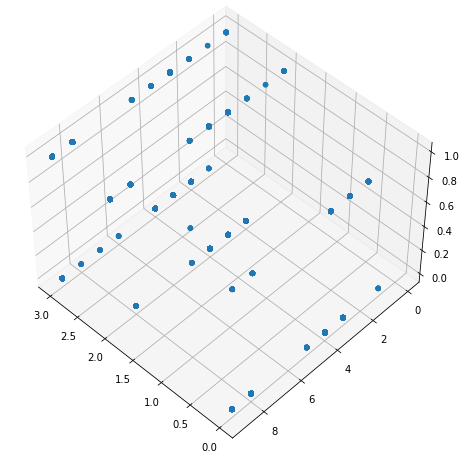

x_pca:
 [[ 0.22820662 -0.34547209 -1.42442516]
 [-1.93656097  4.79691211 -3.51166783]
 [-1.65417317  2.46436226 -3.88082714]
 ...
 [-1.86050705  0.47024369  1.19021196]
 [ 7.29306843 -1.25169256 -1.24197629]
 [-4.83553281 -3.58375805 -0.11250605]]


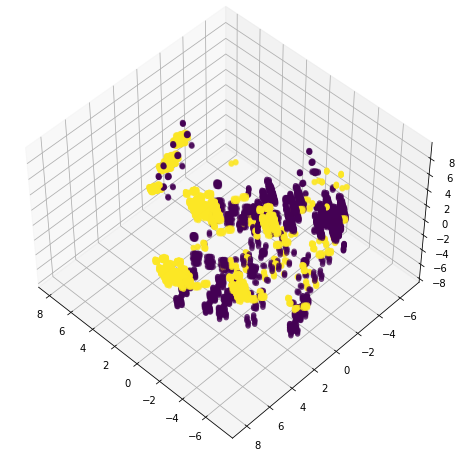

In [77]:
#Plot original
fig = plt.figure(1, figsize=(8,6))
plt.clf()
axis = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)
plt.cla()
print("x:\n", x)
print("x[:,1]:\n", x.iloc[:,1])
axis.scatter(x.iloc[:, 1], x.iloc[:, 2], x.iloc[:, 3])

plt.draw()
plt.show()

#Plot PCA
print("x_pca:\n", x_pca)
y = np.choose(y, [0, 1, 2]).astype(np.float)
fig = plt.figure(2, figsize=(8,6))
plt.clf()
axis2 = Axes3D(fig, rect=[0,0,.95,1], elev=48, azim=134)
plt.cla()
axis2.scatter(x_pca[:,0], x_pca[:,1], x_pca[:,2], c=y)
plt.draw()
plt.show()